# <center><h1 style = "background-color:Black;"><font color = 'white'>BGMI_Prediction</font></h1></center>

<center><img src = "https://media.giphy.com/media/GfCaemm9bltYQFliLp/giphy.gif?cid=790b7611nr5x1e6hmmb6l9uaq51fio9p0y5q2jgff97y4w4o&ep=v1_gifs_search&rid=giphy.gif&ct=g"></center>

### Table Content
1. [Importing Libraries](#import)
2. [Reading Data](#read)
3. [Data Wrangling](#wrang)
4. [Attacking on Anomalies](#Anomalies)
5. [Feature Engineering](#FE)
6. [ML Cat Modelling](#ML)

# <font style = "background-color:Black;"><font color = "orange">Importing Libraries <a class = "anchor" id = "import"></a></font></font>

In [1]:
#basic libraries
import numpy as np
import pandas as pd

#Visulization 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,6)
import seaborn as sns
import dask.dataframe as dd


#Handling Warnings
import warnings
warnings.filterwarnings("ignore")

#Machine learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#tracking progress
from tqdm import tqdm


# <font style = "background-color:Black;"><font color = "white">Reading Data <a class = "anchor" id = "read"></a></font></font>

In [2]:
# load the data
df = pd.read_csv("C:\\Users\\pushk\\Downloads\\PUBG_Game_Prediction_data.csv")

In [3]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [4]:
# data
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
# data dimensions
df.shape

(4446966, 29)

# <font style = "background-color:Black;"><font color = "green">Data Wrangling <a class = "anchor" id = "wrang"></a></font></font>

In [6]:
# check row with Null win prediction value
df[df["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
# remove the row from the data
df.drop(2744604 , inplace = True)

In [8]:
# Preparing a new parameter how many player are in a game
df["playerJoined"] = df.groupby('matchId')['matchId'].transform('count')

In [9]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


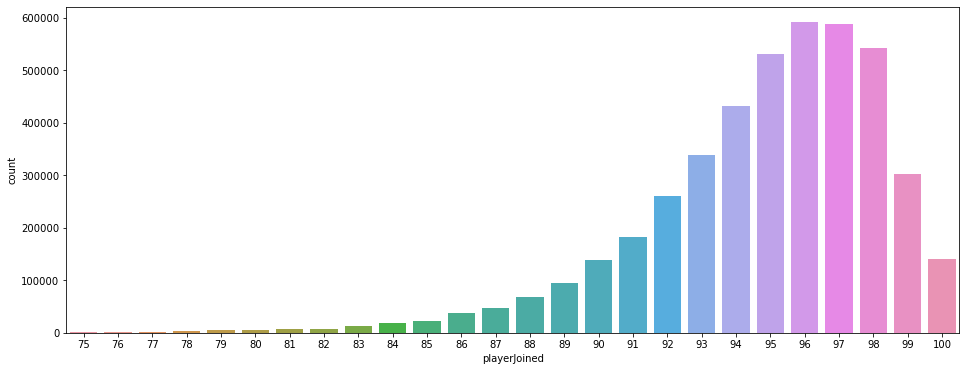

In [10]:
sns.countplot(df[df["playerJoined"]>=75]["playerJoined"])
plt.show()

# <font style = "background-color:Black;"><font color = "orange">Attacking on Anomalies <a class = "anchor" id = "Anomalies"></a></font></font>

# Kills Without Moving

# <center><img src = "https://media.giphy.com/media/7TTWKxyPlG48HWYfi5/giphy.gif?cid=790b76118tfdgxbg1o81ltrzpe4dbjit5xwshhnu4j43523t&ep=v1_gifs_search&rid=giphy.gif&ct=g"></center>

In [11]:
# Kills Without Moving
# prepare  a data parameter to gather the information of the total distance teavelled 
df["totalDistance"] = df["swimDistance"]+df["walkDistance"]+df["rideDistance"]

# prepare a data parameter to check for anomaly detection that the person has not moved but still managed to do the kills

df["killsWithoutMoving"] = ((df["kills"]>0) & (df["totalDistance"] == 0))

In [12]:
df[df["killsWithoutMoving"] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [13]:
df[df["killsWithoutMoving"] == True].shape

(1535, 32)

In [14]:
# drop the anomally
df.drop(df[df["killsWithoutMoving"] == True].index, inplace = True)

# Extra-Ordinary Road Kills !!!!

# <center><img src = "https://media1.tenor.com/m/Qz_WZAauJRUAAAAd/pubg-car.gif"></center>

In [15]:
df[df["roadKills"]>5].shape

(46, 32)

In [16]:
df.drop(df[df["roadKills"]>5].index , inplace = True)

# These many kills - how???

# <center><img src = "https://media1.tenor.com/m/kX7jKETTBn8AAAAC/pubg-mobile-tdm.gif"></center>

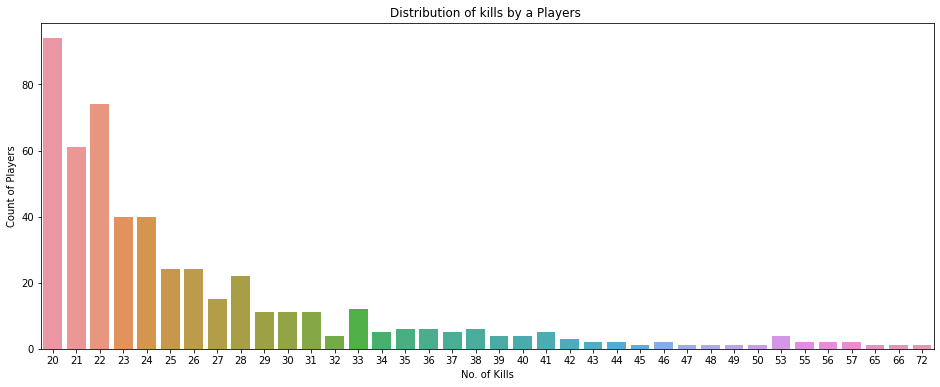

In [17]:
sns.countplot(df[df['kills']>=20]['kills']).set_title("Distribution of kills by a Players ")
plt.ylabel("Count of Players")
plt.xlabel("No. of Kills")
plt.show()

In [18]:
# chechking data dimensions
df[df['kills']>=20].shape

(511, 32)

In [19]:
# delete the data 
df.drop(df[df['kills']>=20].index, inplace = True)

# Head Shot Rate

# <center><img src = "https://media1.tenor.com/m/zTsmJ8JnZaIAAAAd/headshot-playerunknowns-battlegrounds.gif"></center>

In [20]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

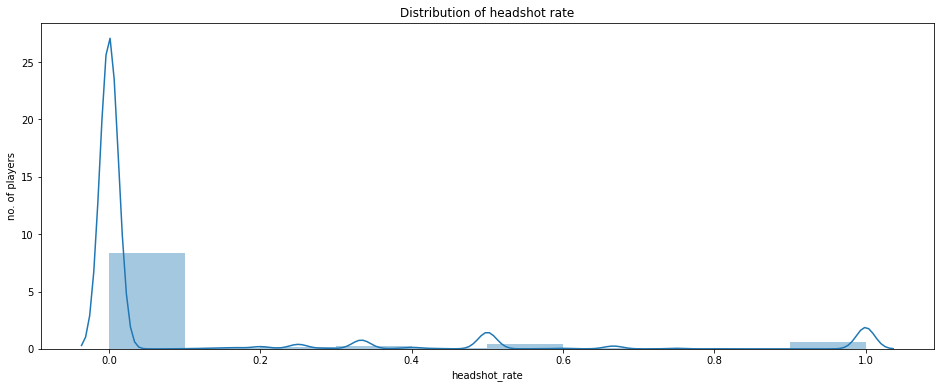

In [21]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins = 10).set_title("Distribution of headshot rate")
plt.ylabel('no. of players')
plt.show()

In [22]:
df[(df['headshot_rate']==1) & (df['kills']>5)].shape

(187, 33)

In [23]:
df.drop(df[(df['headshot_rate']==1) & (df['kills']>5)].index, inplace = True)

# Binocular Kill

# <center><img src = "https://media1.tenor.com/m/8ur8rZoykHgAAAAd/pubg-gun.gif"></center>

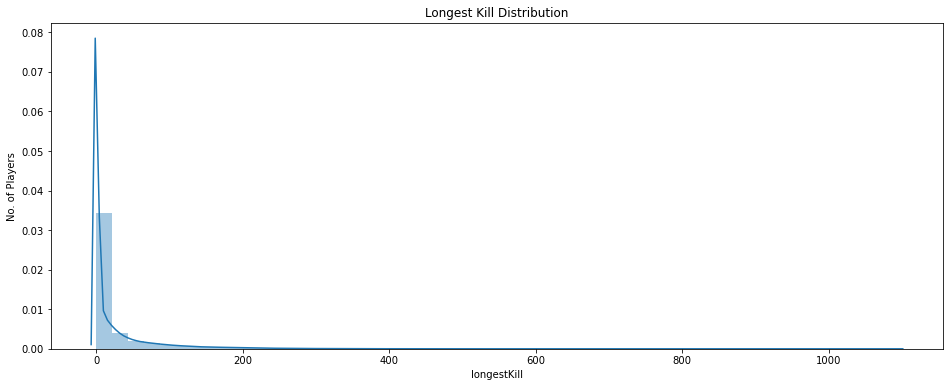

In [24]:
sns.distplot(df['longestKill'], bins = 50).set_title('Longest Kill Distribution')
plt.ylabel('No. of Players')
plt.show()

In [25]:
df[df['longestKill']>=500].shape

(1735, 33)

In [26]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

# Weapons Acquired 

# <center><img src = "https://media.giphy.com/media/BcAK29jGxEaIxUx3QG/giphy.gif"></center>

In [27]:
df[df['weaponsAcquired']>=15].shape

(6755, 33)

In [28]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

# EDA

In [29]:
df.shape

(4436196, 33)

In [30]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playerJoined          0
totalDistance         0
killsWithoutMoving    0
headshot_rate         0
dtype: int64

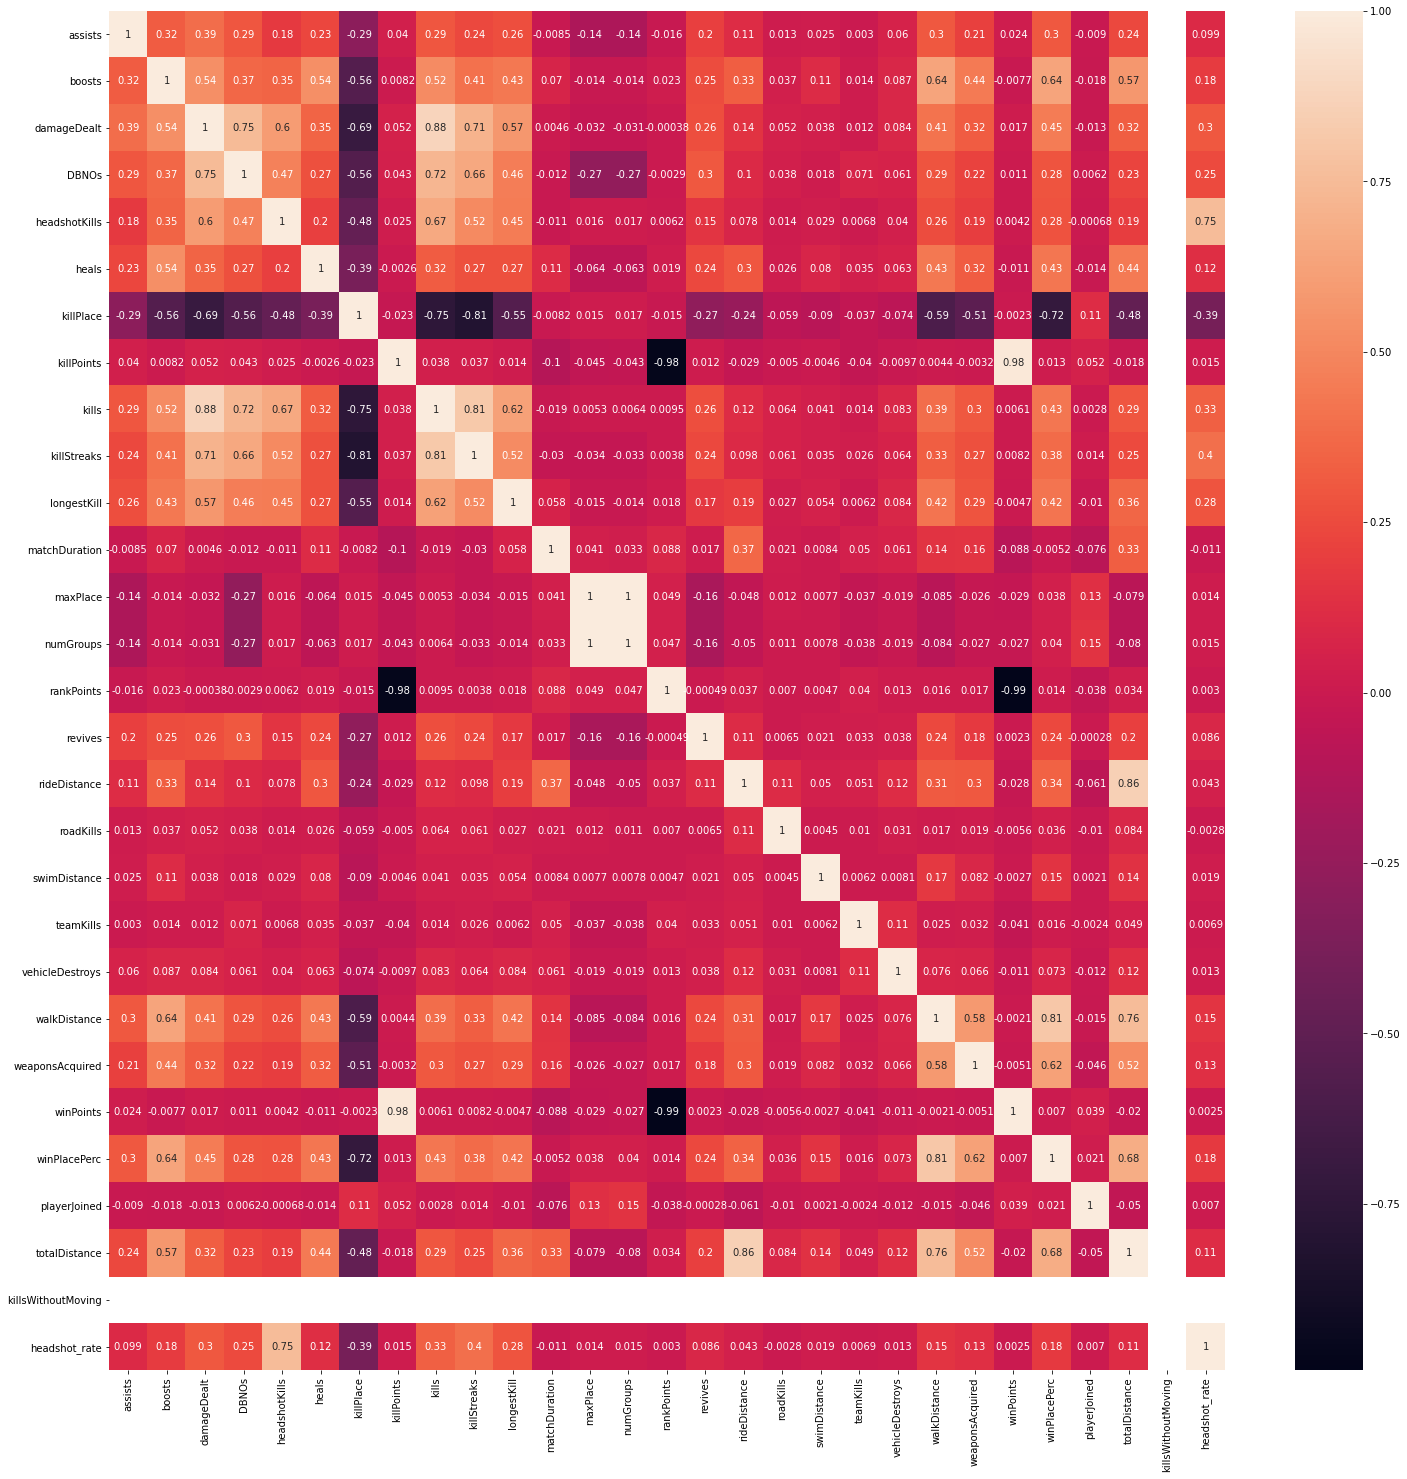

In [31]:
# Checking correlation with win prediction percentile
plt.figure(figsize = [25,25])
sns.heatmap(df.corr(), annot = True)
plt.show()

# <font style = "background-color:Black;"> <font color = white >Feature Engineerig<a class = "anchor" id = "FE"></font></font>

In [32]:
normalising_factor = (100 - df['playerJoined']/100)+1
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['healsnboost'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [33]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerJoined',
       'totalDistance', 'killsWithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm', 'healsnboost',
       'assist'],
      dtype='object')

In [34]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance' , 'swimDistance'
        , 'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration' ] )

# <font style = "background-color:Black;"> <font color = Green >ML Cat Modelling<a class = "anchor" id = "ML"></font></font>


Handling Categorical data

In [48]:
x = data.drop(['winPlacePerc'], axis =1 )
y = data['winPlacePerc']

feature = x.columns

In [49]:
x = pd.get_dummies(x, columns = ['matchType', 'killsWithoutMoving'])



In [50]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [51]:
x.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'playerJoined',
       'totalDistance', 'headshot_rate', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'healsnboost', 'assist',
       'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'killsWithoutMoving_False'],
      dtype='object')

In [56]:
feature = x.columns

In [54]:
x.shape

(4436196, 39)

Scaling The data

In [40]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [41]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.583129,-0.384346,0.449314,1.172491,-0.765130,-0.459627,-0.732890,-1.212388,-0.049563,-0.142506,...,-0.033598,-0.005244,-0.013786,-0.008292,-0.054347,-0.206511,-0.370796,-0.405067,1.236180,0.0
1,-0.583129,-0.384346,0.340021,-0.804730,-0.765130,-0.459627,-0.775864,0.803567,-0.049563,-0.142506,...,-0.033598,-0.005244,-0.013786,-0.008292,-0.054347,-0.206511,-0.370796,-0.405067,1.236180,0.0
2,-0.583129,-0.384346,-0.024286,-0.804730,-0.765130,-0.459627,0.169557,0.813070,-0.049563,-0.142506,...,-0.033598,-0.005244,-0.013786,-0.008292,-0.054347,-0.206511,-0.370796,-0.405067,-0.808944,0.0
3,-0.583129,-0.384346,0.995776,-0.804730,-0.765130,-0.459627,-0.560996,0.700393,-0.049563,-0.142506,...,-0.033598,-0.005244,-0.013786,-0.008292,-0.054347,-0.206511,-0.370796,-0.405067,1.236180,0.0
4,-0.583129,-0.384346,-0.097148,-0.804730,0.647793,0.727591,2.232292,0.906740,-0.049563,-0.142506,...,-0.033598,-0.005244,-0.013786,-0.008292,-0.054347,-0.206511,2.696898,-0.405067,-0.808944,0.0


Splitting Data

In [42]:
xtrain , xtest , ytrain, ytest = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [43]:
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(3105337, 39) (1330859, 39)
(3105337,) (1330859,)


# CatBoost Model

In [44]:
train_dataset = cb.Pool(xtrain,ytrain)
test_dataset = cb.Pool(xtest,ytest)

In [45]:
model = cb.CatBoostRegressor(loss_function = "RMSE")

In [46]:
# Grid Search 
grid = {'iterations' : [100,150],
       'learning_rate' : [0.03, 0.1],
       'depth' : [2,4,6,8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5482928	test: 0.5481329	best: 0.5481329 (0)	total: 658ms	remaining: 1m 5s
1:	learn: 0.5334258	test: 0.5332752	best: 0.5332752 (1)	total: 1.24s	remaining: 1m
2:	learn: 0.5190439	test: 0.5189002	best: 0.5189002 (2)	total: 1.72s	remaining: 55.7s
3:	learn: 0.5051164	test: 0.5049782	best: 0.5049782 (3)	total: 2.2s	remaining: 52.8s
4:	learn: 0.4916470	test: 0.4915155	best: 0.4915155 (4)	total: 2.63s	remaining: 50s
5:	learn: 0.4786223	test: 0.4784969	best: 0.4784969 (5)	total: 3.04s	remaining: 47.6s
6:	learn: 0.4660072	test: 0.4658873	best: 0.4658873 (6)	total: 3.58s	remaining: 47.6s
7:	learn: 0.4538306	test: 0.4537179	best: 0.4537179 (7)	total: 4.01s	remaining: 46.2s
8:	learn: 0.4420506	test: 0.4419450	best: 0.4419450 (8)	total: 4.43s	remaining: 44.8s
9:	learn: 0.4306276	test: 0.4305285	best: 0.4305285 (9)	total: 4.83s	remaining: 43.5s
10:	learn: 0.4195551	test: 0.4194628	best: 0.4194628 (10)	total: 5.25s	remaining: 42.5s
11:	learn: 0.4088893	test: 0.4088028	best: 0.4088028 (11)	

94:	learn: 0.1398194	test: 0.1399206	best: 0.1399206 (94)	total: 40.3s	remaining: 2.12s
95:	learn: 0.1394303	test: 0.1395298	best: 0.1395298 (95)	total: 40.7s	remaining: 1.7s
96:	learn: 0.1390654	test: 0.1391643	best: 0.1391643 (96)	total: 41.1s	remaining: 1.27s
97:	learn: 0.1387068	test: 0.1388082	best: 0.1388082 (97)	total: 41.5s	remaining: 847ms
98:	learn: 0.1383149	test: 0.1384136	best: 0.1384136 (98)	total: 41.9s	remaining: 423ms
99:	learn: 0.1379684	test: 0.1380667	best: 0.1380667 (99)	total: 42.4s	remaining: 0us

bestTest = 0.1380666647
bestIteration = 99

0:	loss: 0.1380667	best: 0.1380667 (0)	total: 54s	remaining: 13m 29s
0:	learn: 0.5127117	test: 0.5125801	best: 0.5125801 (0)	total: 537ms	remaining: 53.2s
1:	learn: 0.4671908	test: 0.4670884	best: 0.4670884 (1)	total: 1.04s	remaining: 50.9s
2:	learn: 0.4264880	test: 0.4264002	best: 0.4264002 (2)	total: 1.55s	remaining: 50.1s
3:	learn: 0.3903753	test: 0.3903044	best: 0.3903044 (3)	total: 2.04s	remaining: 48.9s
4:	learn: 0.35819

87:	learn: 0.1173988	test: 0.1174619	best: 0.1174619 (87)	total: 36.8s	remaining: 5.01s
88:	learn: 0.1172908	test: 0.1173555	best: 0.1173555 (88)	total: 37.2s	remaining: 4.59s
89:	learn: 0.1171800	test: 0.1172466	best: 0.1172466 (89)	total: 37.5s	remaining: 4.17s
90:	learn: 0.1169830	test: 0.1170525	best: 0.1170525 (90)	total: 37.9s	remaining: 3.75s
91:	learn: 0.1165482	test: 0.1166210	best: 0.1166210 (91)	total: 38.4s	remaining: 3.34s
92:	learn: 0.1164422	test: 0.1165166	best: 0.1165166 (92)	total: 38.7s	remaining: 2.91s
93:	learn: 0.1163560	test: 0.1164295	best: 0.1164295 (93)	total: 39.1s	remaining: 2.5s
94:	learn: 0.1162622	test: 0.1163355	best: 0.1163355 (94)	total: 39.6s	remaining: 2.08s
95:	learn: 0.1161780	test: 0.1162485	best: 0.1162485 (95)	total: 40s	remaining: 1.67s
96:	learn: 0.1158952	test: 0.1159615	best: 0.1159615 (96)	total: 40.4s	remaining: 1.25s
97:	learn: 0.1157551	test: 0.1158198	best: 0.1158198 (97)	total: 40.8s	remaining: 833ms
98:	learn: 0.1156770	test: 0.115742

80:	learn: 0.1472371	test: 0.1473365	best: 0.1473365 (80)	total: 32.4s	remaining: 27.6s
81:	learn: 0.1465901	test: 0.1466920	best: 0.1466920 (81)	total: 32.8s	remaining: 27.2s
82:	learn: 0.1459110	test: 0.1460132	best: 0.1460132 (82)	total: 33.2s	remaining: 26.8s
83:	learn: 0.1452903	test: 0.1453923	best: 0.1453923 (83)	total: 33.6s	remaining: 26.4s
84:	learn: 0.1447142	test: 0.1448155	best: 0.1448155 (84)	total: 34s	remaining: 26s
85:	learn: 0.1441037	test: 0.1442026	best: 0.1442026 (85)	total: 34.4s	remaining: 25.6s
86:	learn: 0.1435713	test: 0.1436716	best: 0.1436716 (86)	total: 34.8s	remaining: 25.2s
87:	learn: 0.1430536	test: 0.1431525	best: 0.1431525 (87)	total: 35.2s	remaining: 24.8s
88:	learn: 0.1425070	test: 0.1426051	best: 0.1426051 (88)	total: 35.6s	remaining: 24.4s
89:	learn: 0.1420176	test: 0.1421164	best: 0.1421164 (89)	total: 36s	remaining: 24s
90:	learn: 0.1415510	test: 0.1416514	best: 0.1416514 (90)	total: 36.3s	remaining: 23.6s
91:	learn: 0.1411137	test: 0.1412146	bes

22:	learn: 0.1485145	test: 0.1486135	best: 0.1486135 (22)	total: 9.41s	remaining: 52s
23:	learn: 0.1461731	test: 0.1462717	best: 0.1462717 (23)	total: 9.79s	remaining: 51.4s
24:	learn: 0.1440558	test: 0.1441457	best: 0.1441457 (24)	total: 10.2s	remaining: 50.8s
25:	learn: 0.1422736	test: 0.1423676	best: 0.1423676 (25)	total: 10.5s	remaining: 50.3s
26:	learn: 0.1407706	test: 0.1408707	best: 0.1408707 (26)	total: 10.9s	remaining: 49.7s
27:	learn: 0.1394228	test: 0.1395244	best: 0.1395244 (27)	total: 11.3s	remaining: 49.4s
28:	learn: 0.1382059	test: 0.1383019	best: 0.1383019 (28)	total: 11.7s	remaining: 49s
29:	learn: 0.1369723	test: 0.1370642	best: 0.1370642 (29)	total: 12.2s	remaining: 48.7s
30:	learn: 0.1360227	test: 0.1361201	best: 0.1361201 (30)	total: 12.6s	remaining: 48.3s
31:	learn: 0.1352081	test: 0.1353105	best: 0.1353105 (31)	total: 12.9s	remaining: 47.7s
32:	learn: 0.1343778	test: 0.1344824	best: 0.1344824 (32)	total: 13.4s	remaining: 47.4s
33:	learn: 0.1331498	test: 0.1332469

116:	learn: 0.1137788	test: 0.1138409	best: 0.1138409 (116)	total: 45.7s	remaining: 12.9s
117:	learn: 0.1137089	test: 0.1137723	best: 0.1137723 (117)	total: 46.1s	remaining: 12.5s
118:	learn: 0.1134513	test: 0.1135161	best: 0.1135161 (118)	total: 46.5s	remaining: 12.1s
119:	learn: 0.1131303	test: 0.1131981	best: 0.1131981 (119)	total: 47s	remaining: 11.8s
120:	learn: 0.1130245	test: 0.1130912	best: 0.1130912 (120)	total: 47.4s	remaining: 11.4s
121:	learn: 0.1127318	test: 0.1127976	best: 0.1127976 (121)	total: 47.9s	remaining: 11s
122:	learn: 0.1126257	test: 0.1126903	best: 0.1126903 (122)	total: 48.4s	remaining: 10.6s
123:	learn: 0.1125546	test: 0.1126196	best: 0.1126196 (123)	total: 48.8s	remaining: 10.2s
124:	learn: 0.1124093	test: 0.1124772	best: 0.1124772 (124)	total: 49.1s	remaining: 9.83s
125:	learn: 0.1123485	test: 0.1124157	best: 0.1124157 (125)	total: 49.5s	remaining: 9.43s
126:	learn: 0.1122101	test: 0.1122796	best: 0.1122796 (126)	total: 49.9s	remaining: 9.04s
127:	learn: 0.

58:	learn: 0.1571551	test: 0.1571830	best: 0.1571830 (58)	total: 31.9s	remaining: 22.2s
59:	learn: 0.1553107	test: 0.1553396	best: 0.1553396 (59)	total: 32.5s	remaining: 21.6s
60:	learn: 0.1534001	test: 0.1534335	best: 0.1534335 (60)	total: 33s	remaining: 21.1s
61:	learn: 0.1517541	test: 0.1517911	best: 0.1517911 (61)	total: 33.5s	remaining: 20.5s
62:	learn: 0.1500064	test: 0.1500464	best: 0.1500464 (62)	total: 34.1s	remaining: 20s
63:	learn: 0.1484827	test: 0.1485230	best: 0.1485230 (63)	total: 34.6s	remaining: 19.5s
64:	learn: 0.1469208	test: 0.1469614	best: 0.1469614 (64)	total: 35.1s	remaining: 18.9s
65:	learn: 0.1454221	test: 0.1454625	best: 0.1454625 (65)	total: 35.7s	remaining: 18.4s
66:	learn: 0.1440666	test: 0.1441092	best: 0.1441092 (66)	total: 36.2s	remaining: 17.8s
67:	learn: 0.1426467	test: 0.1426913	best: 0.1426913 (67)	total: 36.9s	remaining: 17.3s
68:	learn: 0.1414080	test: 0.1414536	best: 0.1414536 (68)	total: 37.4s	remaining: 16.8s
69:	learn: 0.1401653	test: 0.1402089

51:	learn: 0.1060363	test: 0.1061276	best: 0.1061276 (51)	total: 28.2s	remaining: 26s
52:	learn: 0.1058475	test: 0.1059402	best: 0.1059402 (52)	total: 28.6s	remaining: 25.4s
53:	learn: 0.1053976	test: 0.1054913	best: 0.1054913 (53)	total: 29.1s	remaining: 24.8s
54:	learn: 0.1051991	test: 0.1052944	best: 0.1052944 (54)	total: 29.6s	remaining: 24.2s
55:	learn: 0.1050005	test: 0.1050949	best: 0.1050949 (55)	total: 30.1s	remaining: 23.6s
56:	learn: 0.1045229	test: 0.1046160	best: 0.1046160 (56)	total: 30.7s	remaining: 23.1s
57:	learn: 0.1042491	test: 0.1043452	best: 0.1043452 (57)	total: 31.2s	remaining: 22.6s
58:	learn: 0.1038667	test: 0.1039688	best: 0.1039688 (58)	total: 31.7s	remaining: 22s
59:	learn: 0.1037051	test: 0.1038044	best: 0.1038044 (59)	total: 32.2s	remaining: 21.5s
60:	learn: 0.1035589	test: 0.1036598	best: 0.1036598 (60)	total: 32.7s	remaining: 20.9s
61:	learn: 0.1032896	test: 0.1033874	best: 0.1033874 (61)	total: 33.2s	remaining: 20.4s
62:	learn: 0.1031016	test: 0.1032003

44:	learn: 0.1928802	test: 0.1928843	best: 0.1928843 (44)	total: 24.8s	remaining: 57.8s
45:	learn: 0.1896167	test: 0.1896245	best: 0.1896245 (45)	total: 25.3s	remaining: 57.3s
46:	learn: 0.1863952	test: 0.1864047	best: 0.1864047 (46)	total: 25.9s	remaining: 56.7s
47:	learn: 0.1832986	test: 0.1833090	best: 0.1833090 (47)	total: 26.4s	remaining: 56.2s
48:	learn: 0.1803909	test: 0.1803989	best: 0.1803989 (48)	total: 27s	remaining: 55.6s
49:	learn: 0.1776373	test: 0.1776487	best: 0.1776487 (49)	total: 27.5s	remaining: 55s
50:	learn: 0.1748733	test: 0.1748868	best: 0.1748868 (50)	total: 28.1s	remaining: 54.5s
51:	learn: 0.1723340	test: 0.1723480	best: 0.1723480 (51)	total: 28.6s	remaining: 54s
52:	learn: 0.1698948	test: 0.1699115	best: 0.1699115 (52)	total: 29.1s	remaining: 53.3s
53:	learn: 0.1675371	test: 0.1675568	best: 0.1675568 (53)	total: 29.7s	remaining: 52.8s
54:	learn: 0.1652680	test: 0.1652890	best: 0.1652890 (54)	total: 30.2s	remaining: 52.2s
55:	learn: 0.1631144	test: 0.1631383	b

137:	learn: 0.1107378	test: 0.1108185	best: 0.1108185 (137)	total: 1m 13s	remaining: 6.41s
138:	learn: 0.1106250	test: 0.1107057	best: 0.1107057 (138)	total: 1m 14s	remaining: 5.87s
139:	learn: 0.1105107	test: 0.1105913	best: 0.1105913 (139)	total: 1m 14s	remaining: 5.34s
140:	learn: 0.1103166	test: 0.1103967	best: 0.1103967 (140)	total: 1m 15s	remaining: 4.8s
141:	learn: 0.1101774	test: 0.1102556	best: 0.1102556 (141)	total: 1m 15s	remaining: 4.27s
142:	learn: 0.1099909	test: 0.1100710	best: 0.1100710 (142)	total: 1m 16s	remaining: 3.74s
143:	learn: 0.1098855	test: 0.1099669	best: 0.1099669 (143)	total: 1m 16s	remaining: 3.2s
144:	learn: 0.1097913	test: 0.1098732	best: 0.1098732 (144)	total: 1m 17s	remaining: 2.67s
145:	learn: 0.1096801	test: 0.1097634	best: 0.1097634 (145)	total: 1m 17s	remaining: 2.13s
146:	learn: 0.1095023	test: 0.1095876	best: 0.1095876 (146)	total: 1m 18s	remaining: 1.6s
147:	learn: 0.1094026	test: 0.1094875	best: 0.1094875 (147)	total: 1m 18s	remaining: 1.06s
14

79:	learn: 0.0998422	test: 0.0999376	best: 0.0999376 (79)	total: 41.9s	remaining: 36.7s
80:	learn: 0.0997572	test: 0.0998547	best: 0.0998547 (80)	total: 42.4s	remaining: 36.2s
81:	learn: 0.0995722	test: 0.0996686	best: 0.0996686 (81)	total: 43s	remaining: 35.6s
82:	learn: 0.0993697	test: 0.0994678	best: 0.0994678 (82)	total: 43.4s	remaining: 35.1s
83:	learn: 0.0991211	test: 0.0992207	best: 0.0992207 (83)	total: 44.1s	remaining: 34.7s
84:	learn: 0.0988512	test: 0.0989530	best: 0.0989530 (84)	total: 44.7s	remaining: 34.2s
85:	learn: 0.0987498	test: 0.0988527	best: 0.0988527 (85)	total: 45.3s	remaining: 33.7s
86:	learn: 0.0985321	test: 0.0986401	best: 0.0986401 (86)	total: 45.7s	remaining: 33.1s
87:	learn: 0.0983249	test: 0.0984353	best: 0.0984353 (87)	total: 46.3s	remaining: 32.6s
88:	learn: 0.0981888	test: 0.0982985	best: 0.0982985 (88)	total: 46.8s	remaining: 32.1s
89:	learn: 0.0981244	test: 0.0982329	best: 0.0982329 (89)	total: 47.3s	remaining: 31.5s
90:	learn: 0.0979443	test: 0.09805

21:	learn: 0.3095822	test: 0.3095257	best: 0.3095257 (21)	total: 15.5s	remaining: 54.8s
22:	learn: 0.3017917	test: 0.3017388	best: 0.3017388 (22)	total: 16.2s	remaining: 54.1s
23:	learn: 0.2943116	test: 0.2942641	best: 0.2942641 (23)	total: 16.8s	remaining: 53.3s
24:	learn: 0.2871386	test: 0.2870962	best: 0.2870962 (24)	total: 17.5s	remaining: 52.6s
25:	learn: 0.2800995	test: 0.2800605	best: 0.2800605 (25)	total: 18.2s	remaining: 51.9s
26:	learn: 0.2733040	test: 0.2732701	best: 0.2732701 (26)	total: 19s	remaining: 51.3s
27:	learn: 0.2667616	test: 0.2667296	best: 0.2667296 (27)	total: 19.7s	remaining: 50.6s
28:	learn: 0.2605037	test: 0.2604755	best: 0.2604755 (28)	total: 20.4s	remaining: 49.9s
29:	learn: 0.2544297	test: 0.2544052	best: 0.2544052 (29)	total: 21.1s	remaining: 49.1s
30:	learn: 0.2485787	test: 0.2485593	best: 0.2485593 (30)	total: 21.7s	remaining: 48.3s
31:	learn: 0.2429091	test: 0.2428939	best: 0.2428939 (31)	total: 22.4s	remaining: 47.7s
32:	learn: 0.2374496	test: 0.23743

14:	learn: 0.1643312	test: 0.1643529	best: 0.1643529 (14)	total: 10.6s	remaining: 1m
15:	learn: 0.1557287	test: 0.1557551	best: 0.1557551 (15)	total: 11.3s	remaining: 59.5s
16:	learn: 0.1484584	test: 0.1484901	best: 0.1484901 (16)	total: 12.2s	remaining: 59.6s
17:	learn: 0.1418738	test: 0.1419181	best: 0.1419181 (17)	total: 13.1s	remaining: 59.5s
18:	learn: 0.1364923	test: 0.1365411	best: 0.1365411 (18)	total: 13.8s	remaining: 59s
19:	learn: 0.1318145	test: 0.1318607	best: 0.1318607 (19)	total: 14.5s	remaining: 58s
20:	learn: 0.1278379	test: 0.1278817	best: 0.1278817 (20)	total: 15.3s	remaining: 57.5s
21:	learn: 0.1242632	test: 0.1243084	best: 0.1243084 (21)	total: 16s	remaining: 56.7s
22:	learn: 0.1209412	test: 0.1209932	best: 0.1209932 (22)	total: 16.7s	remaining: 55.9s
23:	learn: 0.1183127	test: 0.1183700	best: 0.1183700 (23)	total: 17.3s	remaining: 54.9s
24:	learn: 0.1160741	test: 0.1161402	best: 0.1161402 (24)	total: 18s	remaining: 54.1s
25:	learn: 0.1141710	test: 0.1142373	best: 

7:	learn: 0.4496992	test: 0.4495929	best: 0.4495929 (7)	total: 6.19s	remaining: 1m 49s
8:	learn: 0.4374316	test: 0.4373290	best: 0.4373290 (8)	total: 6.99s	remaining: 1m 49s
9:	learn: 0.4255092	test: 0.4254094	best: 0.4254094 (9)	total: 7.85s	remaining: 1m 49s
10:	learn: 0.4140379	test: 0.4139401	best: 0.4139401 (10)	total: 8.54s	remaining: 1m 47s
11:	learn: 0.4028251	test: 0.4027321	best: 0.4027321 (11)	total: 9.22s	remaining: 1m 46s
12:	learn: 0.3920562	test: 0.3919708	best: 0.3919708 (12)	total: 9.87s	remaining: 1m 43s
13:	learn: 0.3816441	test: 0.3815684	best: 0.3815684 (13)	total: 10.6s	remaining: 1m 42s
14:	learn: 0.3715507	test: 0.3714783	best: 0.3714783 (14)	total: 11.3s	remaining: 1m 41s
15:	learn: 0.3618098	test: 0.3617420	best: 0.3617420 (15)	total: 11.9s	remaining: 1m 39s
16:	learn: 0.3523721	test: 0.3523076	best: 0.3523076 (16)	total: 12.6s	remaining: 1m 38s
17:	learn: 0.3432091	test: 0.3431453	best: 0.3431453 (17)	total: 13.3s	remaining: 1m 37s
18:	learn: 0.3343455	test: 

101:	learn: 0.1085727	test: 0.1086417	best: 0.1086417 (101)	total: 1m 11s	remaining: 33.5s
102:	learn: 0.1081787	test: 0.1082503	best: 0.1082503 (102)	total: 1m 11s	remaining: 32.8s
103:	learn: 0.1078971	test: 0.1079703	best: 0.1079703 (103)	total: 1m 12s	remaining: 32.1s
104:	learn: 0.1076181	test: 0.1076933	best: 0.1076933 (104)	total: 1m 13s	remaining: 31.3s
105:	learn: 0.1072904	test: 0.1073666	best: 0.1073666 (105)	total: 1m 13s	remaining: 30.6s
106:	learn: 0.1069468	test: 0.1070259	best: 0.1070259 (106)	total: 1m 14s	remaining: 29.9s
107:	learn: 0.1066493	test: 0.1067291	best: 0.1067291 (107)	total: 1m 15s	remaining: 29.2s
108:	learn: 0.1063367	test: 0.1064180	best: 0.1064180 (108)	total: 1m 15s	remaining: 28.5s
109:	learn: 0.1060342	test: 0.1061162	best: 0.1061162 (109)	total: 1m 16s	remaining: 27.8s
110:	learn: 0.1057623	test: 0.1058425	best: 0.1058425 (110)	total: 1m 17s	remaining: 27.1s
111:	learn: 0.1055284	test: 0.1056085	best: 0.1056085 (111)	total: 1m 17s	remaining: 26.4s

41:	learn: 0.0992848	test: 0.0994051	best: 0.0994051 (41)	total: 29.2s	remaining: 1m 15s
42:	learn: 0.0987974	test: 0.0989201	best: 0.0989201 (42)	total: 29.9s	remaining: 1m 14s
43:	learn: 0.0983854	test: 0.0985130	best: 0.0985130 (43)	total: 30.5s	remaining: 1m 13s
44:	learn: 0.0980210	test: 0.0981509	best: 0.0981509 (44)	total: 31.1s	remaining: 1m 12s
45:	learn: 0.0977088	test: 0.0978403	best: 0.0978403 (45)	total: 31.7s	remaining: 1m 11s
46:	learn: 0.0974930	test: 0.0976261	best: 0.0976261 (46)	total: 32.3s	remaining: 1m 10s
47:	learn: 0.0968457	test: 0.0969752	best: 0.0969752 (47)	total: 33s	remaining: 1m 10s
48:	learn: 0.0965748	test: 0.0967020	best: 0.0967020 (48)	total: 33.6s	remaining: 1m 9s
49:	learn: 0.0962068	test: 0.0963343	best: 0.0963343 (49)	total: 34.3s	remaining: 1m 8s
50:	learn: 0.0959534	test: 0.0960772	best: 0.0960772 (50)	total: 34.9s	remaining: 1m 7s
51:	learn: 0.0956379	test: 0.0957624	best: 0.0957624 (51)	total: 35.5s	remaining: 1m 6s
52:	learn: 0.0952181	test: 

134:	learn: 0.0851262	test: 0.0852559	best: 0.0852559 (134)	total: 1m 33s	remaining: 10.4s
135:	learn: 0.0850816	test: 0.0852112	best: 0.0852112 (135)	total: 1m 33s	remaining: 9.66s
136:	learn: 0.0850337	test: 0.0851591	best: 0.0851591 (136)	total: 1m 34s	remaining: 8.98s
137:	learn: 0.0849452	test: 0.0850695	best: 0.0850695 (137)	total: 1m 35s	remaining: 8.29s
138:	learn: 0.0848998	test: 0.0850248	best: 0.0850248 (138)	total: 1m 36s	remaining: 7.6s
139:	learn: 0.0848539	test: 0.0849769	best: 0.0849769 (139)	total: 1m 36s	remaining: 6.91s
140:	learn: 0.0847939	test: 0.0849159	best: 0.0849159 (140)	total: 1m 37s	remaining: 6.22s
141:	learn: 0.0847605	test: 0.0848818	best: 0.0848818 (141)	total: 1m 38s	remaining: 5.53s
142:	learn: 0.0847065	test: 0.0848265	best: 0.0848265 (142)	total: 1m 38s	remaining: 4.84s
143:	learn: 0.0846694	test: 0.0847889	best: 0.0847889 (143)	total: 1m 39s	remaining: 4.15s
144:	learn: 0.0846311	test: 0.0847514	best: 0.0847514 (144)	total: 1m 40s	remaining: 3.46s


76:	learn: 0.1156734	test: 0.1157528	best: 0.1157528 (76)	total: 1m 8s	remaining: 20.6s
77:	learn: 0.1147609	test: 0.1148397	best: 0.1148397 (77)	total: 1m 9s	remaining: 19.7s
78:	learn: 0.1138964	test: 0.1139766	best: 0.1139766 (78)	total: 1m 10s	remaining: 18.7s
79:	learn: 0.1130591	test: 0.1131430	best: 0.1131430 (79)	total: 1m 11s	remaining: 17.8s
80:	learn: 0.1122821	test: 0.1123666	best: 0.1123666 (80)	total: 1m 12s	remaining: 16.9s
81:	learn: 0.1115233	test: 0.1116101	best: 0.1116101 (81)	total: 1m 12s	remaining: 16s
82:	learn: 0.1107889	test: 0.1108764	best: 0.1108764 (82)	total: 1m 13s	remaining: 15.1s
83:	learn: 0.1101034	test: 0.1101905	best: 0.1101905 (83)	total: 1m 14s	remaining: 14.2s
84:	learn: 0.1093364	test: 0.1094259	best: 0.1094259 (84)	total: 1m 15s	remaining: 13.3s
85:	learn: 0.1087057	test: 0.1087962	best: 0.1087962 (85)	total: 1m 16s	remaining: 12.4s
86:	learn: 0.1081169	test: 0.1082074	best: 0.1082074 (86)	total: 1m 17s	remaining: 11.5s
87:	learn: 0.1074826	test

68:	learn: 0.0869711	test: 0.0871435	best: 0.0871435 (68)	total: 57s	remaining: 25.6s
69:	learn: 0.0868071	test: 0.0869775	best: 0.0869775 (69)	total: 57.9s	remaining: 24.8s
70:	learn: 0.0867303	test: 0.0868976	best: 0.0868976 (70)	total: 58.6s	remaining: 23.9s
71:	learn: 0.0865474	test: 0.0867118	best: 0.0867118 (71)	total: 59.4s	remaining: 23.1s
72:	learn: 0.0863900	test: 0.0865539	best: 0.0865539 (72)	total: 1m	remaining: 22.3s
73:	learn: 0.0862492	test: 0.0864131	best: 0.0864131 (73)	total: 1m 1s	remaining: 21.4s
74:	learn: 0.0861526	test: 0.0863188	best: 0.0863188 (74)	total: 1m 1s	remaining: 20.6s
75:	learn: 0.0860095	test: 0.0861751	best: 0.0861751 (75)	total: 1m 2s	remaining: 19.7s
76:	learn: 0.0858877	test: 0.0860537	best: 0.0860537 (76)	total: 1m 3s	remaining: 18.9s
77:	learn: 0.0858047	test: 0.0859722	best: 0.0859722 (77)	total: 1m 3s	remaining: 18s
78:	learn: 0.0857040	test: 0.0858690	best: 0.0858690 (78)	total: 1m 4s	remaining: 17.2s
79:	learn: 0.0856045	test: 0.0857685	be

60:	learn: 0.1375808	test: 0.1376203	best: 0.1376203 (60)	total: 53.9s	remaining: 1m 18s
61:	learn: 0.1357584	test: 0.1358007	best: 0.1358007 (61)	total: 54.7s	remaining: 1m 17s
62:	learn: 0.1339830	test: 0.1340276	best: 0.1340276 (62)	total: 55.6s	remaining: 1m 16s
63:	learn: 0.1322962	test: 0.1323415	best: 0.1323415 (63)	total: 56.5s	remaining: 1m 15s
64:	learn: 0.1306725	test: 0.1307212	best: 0.1307212 (64)	total: 57.3s	remaining: 1m 14s
65:	learn: 0.1291187	test: 0.1291720	best: 0.1291720 (65)	total: 58.2s	remaining: 1m 14s
66:	learn: 0.1276241	test: 0.1276790	best: 0.1276790 (66)	total: 59.1s	remaining: 1m 13s
67:	learn: 0.1262182	test: 0.1262766	best: 0.1262766 (67)	total: 59.9s	remaining: 1m 12s
68:	learn: 0.1247681	test: 0.1248284	best: 0.1248284 (68)	total: 1m	remaining: 1m 11s
69:	learn: 0.1234557	test: 0.1235188	best: 0.1235188 (69)	total: 1m 1s	remaining: 1m 10s
70:	learn: 0.1221963	test: 0.1222606	best: 0.1222606 (70)	total: 1m 2s	remaining: 1m 9s
71:	learn: 0.1210265	test

1:	learn: 0.4627099	test: 0.4625959	best: 0.4625959 (1)	total: 1.81s	remaining: 2m 14s
2:	learn: 0.4200156	test: 0.4199177	best: 0.4199177 (2)	total: 2.64s	remaining: 2m 9s
3:	learn: 0.3817555	test: 0.3816824	best: 0.3816824 (3)	total: 3.53s	remaining: 2m 8s
4:	learn: 0.3476483	test: 0.3475858	best: 0.3475858 (4)	total: 4.39s	remaining: 2m 7s
5:	learn: 0.3172405	test: 0.3171863	best: 0.3171863 (5)	total: 5.28s	remaining: 2m 6s
6:	learn: 0.2900777	test: 0.2900288	best: 0.2900288 (6)	total: 6.18s	remaining: 2m 6s
7:	learn: 0.2658946	test: 0.2658582	best: 0.2658582 (7)	total: 7.02s	remaining: 2m 4s
8:	learn: 0.2442981	test: 0.2442664	best: 0.2442664 (8)	total: 7.87s	remaining: 2m 3s
9:	learn: 0.2251967	test: 0.2251774	best: 0.2251774 (9)	total: 8.77s	remaining: 2m 2s
10:	learn: 0.2083911	test: 0.2083807	best: 0.2083807 (10)	total: 9.64s	remaining: 2m 1s
11:	learn: 0.1933875	test: 0.1933904	best: 0.1933904 (11)	total: 10.5s	remaining: 2m
12:	learn: 0.1801622	test: 0.1801745	best: 0.1801745

94:	learn: 0.0844190	test: 0.0845959	best: 0.0845959 (94)	total: 1m 15s	remaining: 43.9s
95:	learn: 0.0843459	test: 0.0845221	best: 0.0845221 (95)	total: 1m 16s	remaining: 43s
96:	learn: 0.0842685	test: 0.0844439	best: 0.0844439 (96)	total: 1m 17s	remaining: 42.2s
97:	learn: 0.0841923	test: 0.0843673	best: 0.0843673 (97)	total: 1m 17s	remaining: 41.3s
98:	learn: 0.0841313	test: 0.0843067	best: 0.0843067 (98)	total: 1m 18s	remaining: 40.5s
99:	learn: 0.0840670	test: 0.0842475	best: 0.0842475 (99)	total: 1m 19s	remaining: 39.7s
100:	learn: 0.0840247	test: 0.0842035	best: 0.0842035 (100)	total: 1m 20s	remaining: 38.9s
101:	learn: 0.0839537	test: 0.0841302	best: 0.0841302 (101)	total: 1m 20s	remaining: 38.1s
102:	learn: 0.0838757	test: 0.0840522	best: 0.0840522 (102)	total: 1m 21s	remaining: 37.3s
103:	learn: 0.0838256	test: 0.0840049	best: 0.0840049 (103)	total: 1m 22s	remaining: 36.5s
104:	learn: 0.0837887	test: 0.0839687	best: 0.0839687 (104)	total: 1m 23s	remaining: 35.7s
105:	learn: 0

34:	learn: 0.0965119	test: 0.0966953	best: 0.0966953 (34)	total: 26.2s	remaining: 1m 26s
35:	learn: 0.0959418	test: 0.0961266	best: 0.0961266 (35)	total: 26.8s	remaining: 1m 24s
36:	learn: 0.0953960	test: 0.0955872	best: 0.0955872 (36)	total: 27.5s	remaining: 1m 24s
37:	learn: 0.0948617	test: 0.0950534	best: 0.0950534 (37)	total: 28.2s	remaining: 1m 23s
38:	learn: 0.0942603	test: 0.0944522	best: 0.0944522 (38)	total: 28.9s	remaining: 1m 22s
39:	learn: 0.0937895	test: 0.0939702	best: 0.0939702 (39)	total: 29.6s	remaining: 1m 21s
40:	learn: 0.0934526	test: 0.0936355	best: 0.0936355 (40)	total: 30.3s	remaining: 1m 20s
41:	learn: 0.0931138	test: 0.0933031	best: 0.0933031 (41)	total: 30.9s	remaining: 1m 19s
42:	learn: 0.0926106	test: 0.0927929	best: 0.0927929 (42)	total: 31.5s	remaining: 1m 18s
43:	learn: 0.0920739	test: 0.0922557	best: 0.0922557 (43)	total: 32.2s	remaining: 1m 17s
44:	learn: 0.0917989	test: 0.0919783	best: 0.0919783 (44)	total: 32.9s	remaining: 1m 16s
45:	learn: 0.0913852	

127:	learn: 0.0827239	test: 0.0829208	best: 0.0829208 (127)	total: 1m 28s	remaining: 15.2s
128:	learn: 0.0826832	test: 0.0828807	best: 0.0828807 (128)	total: 1m 28s	remaining: 14.5s
129:	learn: 0.0826396	test: 0.0828367	best: 0.0828367 (129)	total: 1m 29s	remaining: 13.8s
130:	learn: 0.0826062	test: 0.0828040	best: 0.0828040 (130)	total: 1m 30s	remaining: 13.1s
131:	learn: 0.0825784	test: 0.0827774	best: 0.0827774 (131)	total: 1m 30s	remaining: 12.4s
132:	learn: 0.0825616	test: 0.0827618	best: 0.0827618 (132)	total: 1m 31s	remaining: 11.7s
133:	learn: 0.0825337	test: 0.0827354	best: 0.0827354 (133)	total: 1m 32s	remaining: 11s
134:	learn: 0.0824939	test: 0.0826956	best: 0.0826956 (134)	total: 1m 32s	remaining: 10.3s
135:	learn: 0.0824443	test: 0.0826445	best: 0.0826445 (135)	total: 1m 33s	remaining: 9.64s
136:	learn: 0.0824216	test: 0.0826246	best: 0.0826246 (136)	total: 1m 34s	remaining: 8.94s
137:	learn: 0.0823976	test: 0.0826037	best: 0.0826037 (137)	total: 1m 34s	remaining: 8.25s
1

69:	learn: 0.0868706	test: 0.0867381	best: 0.0867381 (69)	total: 49.8s	remaining: 56.9s
70:	learn: 0.0867654	test: 0.0866382	best: 0.0866382 (70)	total: 50.5s	remaining: 56.2s
71:	learn: 0.0866836	test: 0.0865571	best: 0.0865571 (71)	total: 51.1s	remaining: 55.3s
72:	learn: 0.0865261	test: 0.0863989	best: 0.0863989 (72)	total: 51.8s	remaining: 54.6s
73:	learn: 0.0864300	test: 0.0863047	best: 0.0863047 (73)	total: 52.5s	remaining: 54s
74:	learn: 0.0863776	test: 0.0862548	best: 0.0862548 (74)	total: 53.1s	remaining: 53.1s
75:	learn: 0.0862608	test: 0.0861443	best: 0.0861443 (75)	total: 53.6s	remaining: 52.2s
76:	learn: 0.0861501	test: 0.0860363	best: 0.0860363 (76)	total: 54.2s	remaining: 51.4s
77:	learn: 0.0860302	test: 0.0859148	best: 0.0859148 (77)	total: 55s	remaining: 50.8s
78:	learn: 0.0859361	test: 0.0858256	best: 0.0858256 (78)	total: 55.6s	remaining: 50s
79:	learn: 0.0858318	test: 0.0857225	best: 0.0857225 (79)	total: 56.4s	remaining: 49.3s
80:	learn: 0.0857674	test: 0.0856608	b

11:	learn: 0.1934981	test: 0.1935506	best: 0.1935506 (11)	total: 9.61s	remaining: 1m 50s
12:	learn: 0.1804487	test: 0.1804969	best: 0.1804969 (12)	total: 10.3s	remaining: 1m 49s
13:	learn: 0.1689189	test: 0.1689739	best: 0.1689739 (13)	total: 11.1s	remaining: 1m 47s
14:	learn: 0.1587464	test: 0.1587986	best: 0.1587986 (14)	total: 11.9s	remaining: 1m 47s
15:	learn: 0.1499791	test: 0.1500327	best: 0.1500327 (15)	total: 12.6s	remaining: 1m 45s
16:	learn: 0.1422791	test: 0.1423381	best: 0.1423381 (16)	total: 13.3s	remaining: 1m 44s
17:	learn: 0.1353963	test: 0.1354624	best: 0.1354624 (17)	total: 14.2s	remaining: 1m 44s
18:	learn: 0.1295845	test: 0.1296617	best: 0.1296617 (18)	total: 15s	remaining: 1m 43s
19:	learn: 0.1245959	test: 0.1246686	best: 0.1246686 (19)	total: 15.7s	remaining: 1m 41s
20:	learn: 0.1201676	test: 0.1202412	best: 0.1202412 (20)	total: 16.4s	remaining: 1m 40s
21:	learn: 0.1164898	test: 0.1165625	best: 0.1165625 (21)	total: 17.2s	remaining: 1m 39s
22:	learn: 0.1132790	te

104:	learn: 0.0837730	test: 0.0839597	best: 0.0839597 (104)	total: 1m 12s	remaining: 31s
105:	learn: 0.0837194	test: 0.0839065	best: 0.0839065 (105)	total: 1m 13s	remaining: 30.4s
106:	learn: 0.0836863	test: 0.0838746	best: 0.0838746 (106)	total: 1m 13s	remaining: 29.7s
107:	learn: 0.0836311	test: 0.0838249	best: 0.0838249 (107)	total: 1m 14s	remaining: 29s
108:	learn: 0.0835789	test: 0.0837713	best: 0.0837713 (108)	total: 1m 15s	remaining: 28.3s
109:	learn: 0.0835485	test: 0.0837431	best: 0.0837431 (109)	total: 1m 15s	remaining: 27.5s
110:	learn: 0.0834834	test: 0.0836810	best: 0.0836810 (110)	total: 1m 16s	remaining: 26.8s
111:	learn: 0.0834198	test: 0.0836169	best: 0.0836169 (111)	total: 1m 16s	remaining: 26.1s
112:	learn: 0.0833819	test: 0.0835772	best: 0.0835772 (112)	total: 1m 17s	remaining: 25.4s
113:	learn: 0.0833438	test: 0.0835383	best: 0.0835383 (113)	total: 1m 18s	remaining: 24.7s
114:	learn: 0.0833047	test: 0.0834991	best: 0.0834991 (114)	total: 1m 18s	remaining: 24s
115:	

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [57]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = feature
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by='importance',ascending = False)

In [60]:
feature_importance_df = feature_importance_df.sort_values(by = "importance", ascending = False)
feature_importance_df

,features,importance
2,killPlace,40.761540
14,totalDistance,25.041023
16,killsNorm,9.934431
19,matchDurationNorm,4.864572
13,playerJoined,4.646109
4,killStreaks,4.635196
6,numGroups,2.516729
5,longestKill,2.397918
20,healsnboost,1.881812
0,DBNOs,1.043249


<function matplotlib.pyplot.show(close=None, block=None)>

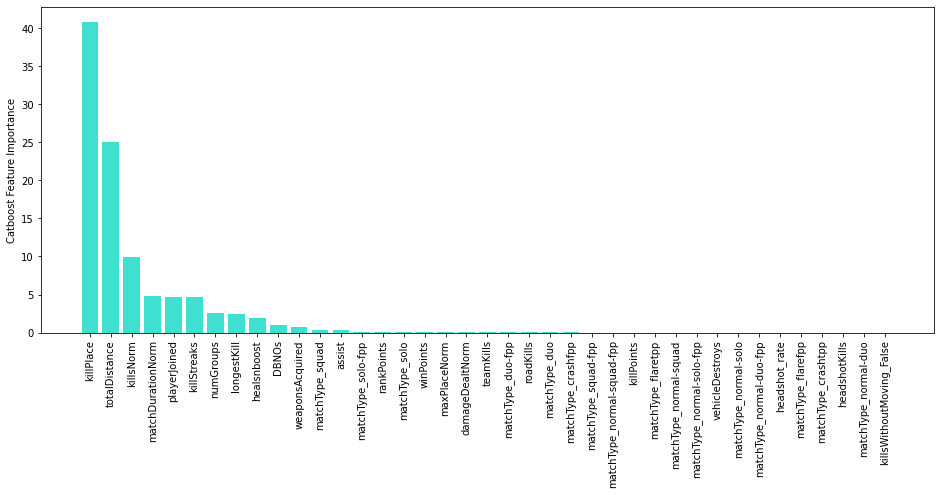

In [63]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color = 'turquoise')
plt.ylabel('Catboost Feature Importance')
plt.xticks(rotation = 90)
plt.show


## Prediction

In [65]:
pred = model.predict(xtest)

In [66]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print('Testing performance')

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


# <center><img src = "https://media.giphy.com/media/LKq8QxaQ8Kh3OJHJ8h/giphy.gif?cid=790b7611in6crx4nbu0sjap1r7vzqhvgrsmm2ymwpc733pcj&ep=v1_gifs_search&rid=giphy.gif&ct=g"></center>